### INSY 662 Team Project
Team members: David Gao, Farah Hoque, Kritika Nayyar, Tashfeen Ahmed, Yifan Lu

import crime data using api and perform preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.lacity.org", None)
results = client.get("2nrs-mtv8", limit=20000000)

# Convert to pandas DataFrame
raw_df = pd.DataFrame.from_records(results)

In [4]:
raw_df.shape

(838901, 28)

In [5]:
display(HTML(raw_df.head().to_html()))  

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street,crm_cd_3,crm_cd_4
0,010304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,03,Southwest,0377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN,NaN,NaN
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,0330,01,Central,0163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN,NaN,NaN
2,200110444,2020-04-14T00:00:00.000,2020-02-13T00:00:00.000,1200,01,Central,0155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN,NaN,NaN
3,191501505,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998,NaN,NaN,NaN
4,191921269,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",0329,31,X,X,409,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN,NaN,NaN


In [6]:
raw_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'location', 'lat', 'lon', 'crm_cd_2', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [7]:
#null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(raw_df.isnull().sum())

dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1_2               0
crm_cd                 0
crm_cd_desc            0
mocodes           116254
vict_age               0
vict_sex          110555
vict_descent      110563
premis_cd             10
premis_desc          506
weapon_used_cd    546510
weapon_desc       546510
status                 0
status_desc            0
crm_cd_1              11
location               0
lat                    0
lon                    0
crm_cd_2          777267
cross_street      705089
crm_cd_3          836820
crm_cd_4          838840
dtype: int64


In [8]:
#drop unnecessary columns, and columns with alot of null values

raw_df1=raw_df.drop(['dr_no','date_rptd','weapon_used_cd','weapon_desc','crm_cd_1','crm_cd_2','crm_cd_3','crm_cd_4','location','cross_street','area_name','part_1_2','crm_cd_desc','premis_desc','rpt_dist_no', 'mocodes','status'],axis=1)


In [9]:
raw_df1.shape

(838901, 11)

In [10]:
raw_df1 = raw_df1.dropna()

In [11]:
#drop duplicates
raw_df1.drop_duplicates(inplace=True)

In [12]:
raw_df1['date_occ']=pd.to_datetime(raw_df1['date_occ'])

In [13]:
raw_df1['date_occ'] = raw_df1['date_occ'].astype(str)
raw_df1[['year', 'month', 'day']] = raw_df1['date_occ'].str.split('-', expand=True).astype(int)


In [14]:
raw_df1['time_occ'] = raw_df1['time_occ'].astype(str)

raw_df1['time_occ'] = raw_df1['time_occ'].apply(lambda x: x.zfill(4))

# Create a new column 'formatted_time' with the standard time format
raw_df1['rounded_crime_time'] = raw_df1['time_occ'].str[:2] + ':' + raw_df1['time_occ'].str[2:] 
raw_df1['rounded_crime_time'] = pd.to_datetime(raw_df1['rounded_crime_time'], format='%H:%M')
raw_df1['rounded_crime_time'] = raw_df1['rounded_crime_time'].dt.round('H').dt.time
raw_df1['rounded_crime_time'] = pd.to_datetime(raw_df1['rounded_crime_time'], format='%H:%M:%S')
raw_df1['rounded_crime_time'] = raw_df1['rounded_crime_time'].dt.strftime('%H:%M')



In [15]:
display(HTML(raw_df1.head().to_html()))

,date_occ,time_occ,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,status_desc,lat,lon,year,month,day,rounded_crime_time
0,2020-01-08,2230,03,624,36,F,B,501,Adult Other,34.0141,-118.2978,2020,1,8,22:00
1,2020-01-01,0330,01,624,25,M,H,102,Invest Cont,34.0459,-118.2545,2020,1,1,04:00
2,2020-02-13,1200,01,845,0,X,X,726,Adult Arrest,34.0448,-118.2474,2020,2,13,12:00
3,2020-01-01,1730,15,745,76,F,W,502,Invest Cont,34.1685,-118.4019,2020,1,1,18:00
4,2020-01-01,0415,19,740,31,X,X,409,Invest Cont,34.2198,-118.4468,2020,1,1,04:00


In [16]:
summary_df = pd.DataFrame({
    'Missing Values': raw_df1.isnull().sum(),
    'Unique Values': raw_df1.nunique(),
    'Data Type': raw_df1.dtypes,
    'Number of Duplicates': raw_df1.duplicated().sum()
})

In [17]:
display(HTML(summary_df.to_html()))

,Missing Values,Unique Values,Data Type,Number of Duplicates
date_occ,0,1413,object,0
time_occ,0,1439,object,0
area,0,21,object,0
crm_cd,0,137,object,0
vict_age,0,102,object,0
vict_sex,0,5,object,0
vict_descent,0,20,object,0
premis_cd,0,313,object,0
status_desc,0,6,object,0
lat,0,5446,object,0


In [18]:
raw_df1['vict_sex'].value_counts()

M    344638
F    308187
X     72615
H        91
-         1
Name: vict_sex, dtype: int64

In [19]:
#numbers of rows where vict_sex and vict_descent are unknown
count = ((raw_df1['vict_sex'] == 'X') & (raw_df1['vict_descent'] == 'X')).sum()
count


71987

In [20]:
#delete the '-' and X (unknown) value in vict_sex column
raw_df1 = raw_df1[raw_df1['vict_sex']!= '-']
raw_df1 = raw_df1[raw_df1['vict_sex']!= 'X']

In [21]:
#delete the X value in vict_descent column
raw_df1 = raw_df1[raw_df1['vict_descent']!= 'X']

In [22]:
raw_df1.shape

(644806, 15)

In [23]:
#age greater than 0
raw_df1 = raw_df1[(raw_df1['vict_age']>='0')]

In [24]:
raw_df1.describe()

,year,month,day
count,644783.000000,644783.000000,644783.000000
mean,2021.493299,6.327940,15.187429
std,1.087589,3.357636,8.997015
min,2020.000000,1.000000,1.000000
25%,2021.000000,3.000000,7.000000
50%,2022.000000,6.000000,15.000000
75%,2022.000000,9.000000,23.000000
max,2023.000000,12.000000,31.000000


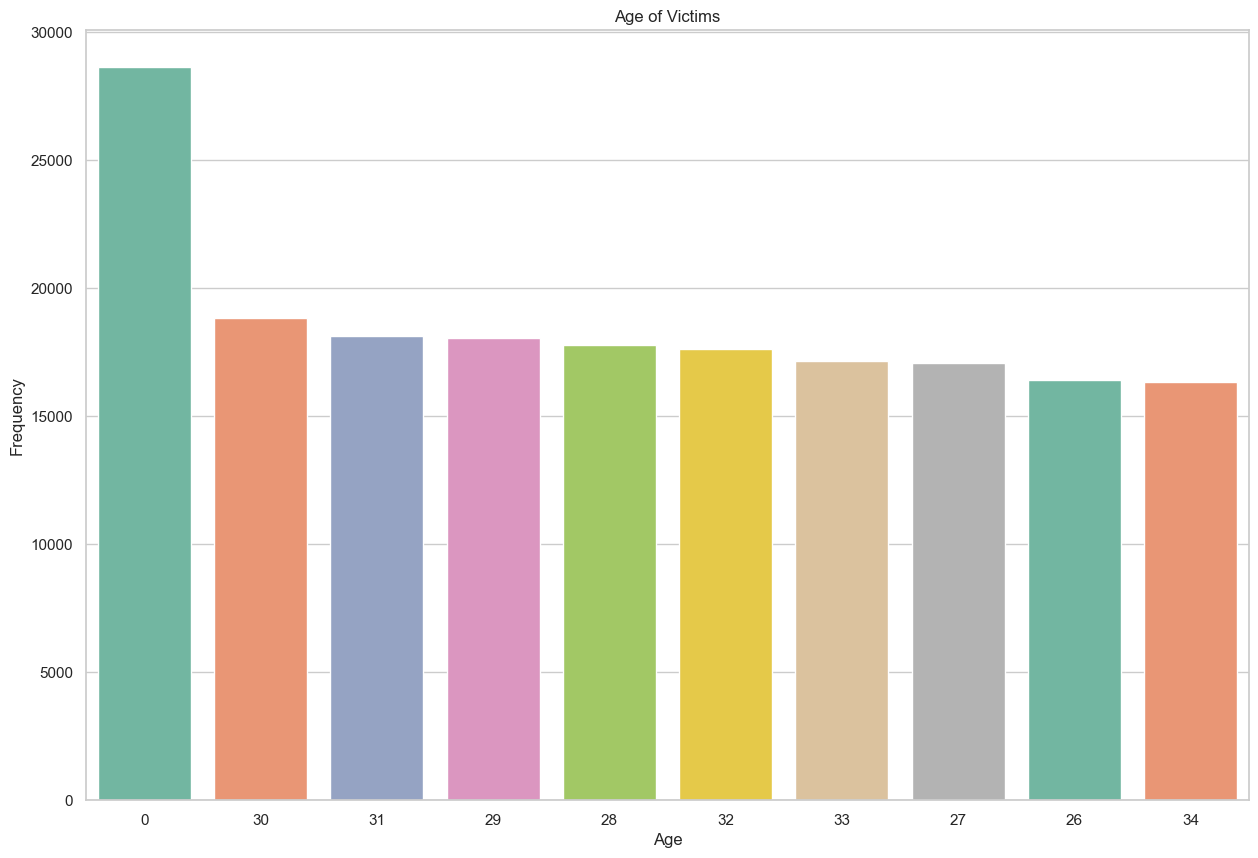

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
top_ages = raw_df1['vict_age'].value_counts().head(10)
sns.barplot(x=top_ages.index, y=top_ages.values, palette="Set2")
plt.title('Age of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [26]:
#investigate 0 age
raw_df1[raw_df1['vict_age']=='0']

,date_occ,time_occ,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,status_desc,lat,lon,year,month,day,rounded_crime_time
40,2020-01-29,1930,01,442,0,M,W,404,Invest Cont,34.0480,-118.2577,2020,1,29,20:00
53,2020-12-01,1200,01,845,0,M,O,726,Adult Arrest,34.0448,-118.2474,2020,12,1,12:00
84,2020-01-02,1305,01,442,0,M,H,404,Invest Cont,34.0480,-118.2577,2020,1,2,13:00
167,2020-01-04,2145,01,330,0,M,B,101,Invest Cont,34.0446,-118.2490,2020,1,4,22:00
216,2020-01-06,1900,01,888,0,M,W,203,Invest Cont,34.0569,-118.2385,2020,1,6,19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838752,2023-09-15,1350,21,740,0,M,W,122,Invest Cont,34.1937,-118.6193,2023,9,15,14:00
838787,2023-05-09,0100,03,740,0,M,O,210,Invest Cont,34.0215,-118.3556,2023,5,9,01:00
838821,2023-08-13,1600,08,442,0,M,O,203,Invest Cont,34.0611,-118.4184,2023,8,13,16:00
838831,2023-01-04,2255,10,343,0,M,W,402,Invest Cont,34.1629,-118.5202,2023,1,4,23:00


In [27]:
#delete victim age 0 as these are null values they put in 0 for them
raw_df1 = raw_df1[raw_df1['vict_age']!='0']

In [28]:
display(HTML(raw_df1.head().to_html()))

,date_occ,time_occ,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,status_desc,lat,lon,year,month,day,rounded_crime_time
0,2020-01-08,2230,03,624,36,F,B,501,Adult Other,34.0141,-118.2978,2020,1,8,22:00
1,2020-01-01,0330,01,624,25,M,H,102,Invest Cont,34.0459,-118.2545,2020,1,1,04:00
3,2020-01-01,1730,15,745,76,F,W,502,Invest Cont,34.1685,-118.4019,2020,1,1,18:00
5,2020-01-01,0030,01,121,25,F,H,735,Invest Cont,34.0452,-118.2534,2020,1,1,00:00
6,2020-01-02,1315,01,442,23,M,H,404,Invest Cont,34.0483,-118.2631,2020,1,2,13:00


Weather data 

Dont run weather api code again to avoid API charges

In [29]:
#import urllib.request
#import pandas as pd
#
#try:
#    url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/los%20angeles/2020-01-01/2022-08-31?unitGroup=metric&include=days&key=U9MTPEEWF73ZN3ZCJUS8JABMY&contentType=csv"
#    weather_df_2020_2022_August = pd.read_csv(url)
#except Exception as e:
#    print("An error occurred:", str(e))


In [30]:
#file_path = r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\Weather\Daily Weather\weather_df_2020_2022_August.csv'
#
## Save the DataFrame to a CSV file
#weather_df_2020_2022_August.to_csv(file_path, index=False)  


In [31]:
#try:
#    url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/los%20angeles/2022-09-01/2023-10-29?unitGroup=metric&include=days&key=7AMU6SK9AT9D4G9Q9XPZPKV7K&contentType=csv"
#    weather_df_2022_Sept_2023 = pd.read_csv(url)
#except Exception as e:
#    print("An error occurred:", str(e))


In [32]:
#file_path = r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\Weather\Daily Weather\weather_data_2022_2023.csv'
#
#weather_df_2022_Sept_2023.to_csv(file_path, index=False)  

In [33]:
#weather_df=pd.concat([weather_df_2020_2022_August,weather_df_2022_Sept_2023],ignore_index=True)

In [34]:
#file_path = r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\Weather\Daily Weather\weather_df.csv'

#weather_df.to_csv(file_path, index=False)  

Preprocessing Weather Data

In [35]:
#read weather data from csv
weather_df = pd.read_csv('weather_df.csv')

In [36]:
weather_df.shape

(1398, 33)

In [37]:
display(HTML(weather_df.head().to_html()))

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Los Angeles, CA, United States",2020-01-01,20.8,10.0,15.2,20.8,10.0,15.2,3.8,48.9,0.0,0.0,0.0,NaN,0,0,NaN,12.0,27.6,1015.7,1.9,15.3,136.8,11.9,5,NaN,2020-01-01T06:58:38,2020-01-01T16:54:25,0.21,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,72287493134,CQ070"
1,"Los Angeles, CA, United States",2020-01-02,20.4,10.8,14.8,20.4,10.8,14.8,9.1,69.6,0.0,0.0,0.0,NaN,0,0,NaN,11.1,73.1,1014.6,8.8,14.1,121.4,10.4,5,NaN,2020-01-02T06:58:50,2020-01-02T16:55:10,0.25,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,72287493134,CQ070"
2,"Los Angeles, CA, United States",2020-01-03,23.5,10.9,16.2,23.5,10.9,16.2,5.6,53.0,0.0,0.0,0.0,NaN,0,0,NaN,8.1,306.1,1022.6,2.2,15.7,129.1,11.2,5,NaN,2020-01-03T06:58:59,2020-01-03T16:55:57,0.28,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,72287493134,CQ070"
3,"Los Angeles, CA, United States",2020-01-04,21.4,9.8,14.7,21.4,9.8,14.7,7.4,63.6,0.0,0.0,0.0,NaN,0,0,NaN,6.6,284.8,1025.9,1.2,14.0,135.5,11.8,5,NaN,2020-01-04T06:59:07,2020-01-04T16:56:44,0.31,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,72287493134,CQ070"
4,"Los Angeles, CA, United States",2020-01-05,21.4,9.3,14.5,21.4,9.3,14.5,5.9,59.1,0.0,0.0,0.0,NaN,0,0,29.5,8.6,311.2,1024.2,2.2,15.0,136.5,11.6,6,NaN,2020-01-05T06:59:13,2020-01-05T16:57:33,0.34,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,72287493134,CQ070"


In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(weather_df.describe())

           tempmax      tempmin         temp  feelslikemax  feelslikemin  \
count  1398.000000  1398.000000  1398.000000   1398.000000   1398.000000   
mean     23.303290    14.329971    18.250644     23.244206     14.294134   
std       4.917116     4.168635     4.037946      4.838131      4.227763   
min      10.700000    -3.500000     8.300000     10.700000     -3.500000   
25%      19.700000    11.100000    15.000000     19.700000     11.100000   
50%      23.200000    14.700000    18.100000     23.200000     14.700000   
75%      26.600000    17.600000    21.300000     26.500000     17.600000   
max      41.800000    26.300000    32.400000     42.300000     26.300000   

         feelslike          dew     humidity       precip   precipprob  \
count  1398.000000  1398.000000  1398.000000  1398.000000  1398.000000   
mean     18.229828     9.928684    62.274034     0.873124    11.476538   
std       4.045005     5.919577    14.283090     4.849724    31.839994   
min       7.400000 

In [40]:
#comparing min maxx and mean values for all variables there seems to be no outliers

In [41]:
#select columns to be used in model
weather_df1 = weather_df[['datetime','tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','sunrise','sunset','moonphase','conditions']]

In [42]:
display(HTML(weather_df1.head().to_html()))

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-01-01,20.8,10.0,15.2,3.8,48.9,0.0,0.0,0.0,12.0,27.6,1015.7,1.9,15.3,136.8,11.9,5,2020-01-01T06:58:38,2020-01-01T16:54:25,0.21,Clear
1,2020-01-02,20.4,10.8,14.8,9.1,69.6,0.0,0.0,0.0,11.1,73.1,1014.6,8.8,14.1,121.4,10.4,5,2020-01-02T06:58:50,2020-01-02T16:55:10,0.25,Clear
2,2020-01-03,23.5,10.9,16.2,5.6,53.0,0.0,0.0,0.0,8.1,306.1,1022.6,2.2,15.7,129.1,11.2,5,2020-01-03T06:58:59,2020-01-03T16:55:57,0.28,Clear
3,2020-01-04,21.4,9.8,14.7,7.4,63.6,0.0,0.0,0.0,6.6,284.8,1025.9,1.2,14.0,135.5,11.8,5,2020-01-04T06:59:07,2020-01-04T16:56:44,0.31,Clear
4,2020-01-05,21.4,9.3,14.5,5.9,59.1,0.0,0.0,0.0,8.6,311.2,1024.2,2.2,15.0,136.5,11.6,6,2020-01-05T06:59:13,2020-01-05T16:57:33,0.34,Clear


In [43]:
weather_df1.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
dtype: int64

In [44]:
weather_df1.duplicated().sum()

0

In [45]:
weather_df1.dtypes

datetime             object
tempmax             float64
tempmin             float64
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
dtype: object

Convert time values into 24 hours format

In [46]:
weather_df1['datetime'] = pd.to_datetime(weather_df1['datetime'])   

C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\462579873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df1['datetime'] = pd.to_datetime(weather_df1['datetime'])


In [47]:
#split datetime column into year, month, day
weather_df1['year'] = weather_df1['datetime'].dt.year
weather_df1['month'] = weather_df1['datetime'].dt.month
weather_df1['day'] = weather_df1['datetime'].dt.day


C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\220032828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df1['year'] = weather_df1['datetime'].dt.year
C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\220032828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df1['month'] = weather_df1['datetime'].dt.month
C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\220032828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [49]:
display(HTML(weather_df1.head().to_html()))

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,year,month,day
0,2020-01-01,20.8,10.0,15.2,3.8,48.9,0.0,0.0,0.0,12.0,27.6,1015.7,1.9,15.3,136.8,11.9,5,2020-01-01T06:58:38,2020-01-01T16:54:25,0.21,Clear,2020,1,1
1,2020-01-02,20.4,10.8,14.8,9.1,69.6,0.0,0.0,0.0,11.1,73.1,1014.6,8.8,14.1,121.4,10.4,5,2020-01-02T06:58:50,2020-01-02T16:55:10,0.25,Clear,2020,1,2
2,2020-01-03,23.5,10.9,16.2,5.6,53.0,0.0,0.0,0.0,8.1,306.1,1022.6,2.2,15.7,129.1,11.2,5,2020-01-03T06:58:59,2020-01-03T16:55:57,0.28,Clear,2020,1,3
3,2020-01-04,21.4,9.8,14.7,7.4,63.6,0.0,0.0,0.0,6.6,284.8,1025.9,1.2,14.0,135.5,11.8,5,2020-01-04T06:59:07,2020-01-04T16:56:44,0.31,Clear,2020,1,4
4,2020-01-05,21.4,9.3,14.5,5.9,59.1,0.0,0.0,0.0,8.6,311.2,1024.2,2.2,15.0,136.5,11.6,6,2020-01-05T06:59:13,2020-01-05T16:57:33,0.34,Clear,2020,1,5


Join weather with crime data and perform preprocessing

In [50]:
#join weather data with crime data
df_final=raw_df1.merge(weather_df1, left_on=['year','month','day'], right_on=['year','month','day'], how='inner')

In [51]:
df_final.shape

(611211, 36)

In [52]:
display(HTML(df_final.head().to_html()))

,date_occ,time_occ,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,status_desc,lat,lon,year,month,day,rounded_crime_time,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-01-08,2230,03,624,36,F,B,501,Adult Other,34.0141,-118.2978,2020,1,8,22:00,2020-01-08,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,2020-01-08T06:59:19,2020-01-08T17:00:05,0.44,Partially cloudy
1,2020-01-08,1805,01,442,24,F,H,252,Invest Cont,34.0515,-118.2424,2020,1,8,18:00,2020-01-08,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,2020-01-08T06:59:19,2020-01-08T17:00:05,0.44,Partially cloudy
2,2020-01-08,0315,01,350,29,F,H,123,Adult Arrest,34.0457,-118.2665,2020,1,8,03:00,2020-01-08,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,2020-01-08T06:59:19,2020-01-08T17:00:05,0.44,Partially cloudy
3,2020-01-08,0117,01,755,29,M,H,741,Invest Cont,34.0431,-118.2692,2020,1,8,01:00,2020-01-08,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,2020-01-08T06:59:19,2020-01-08T17:00:05,0.44,Partially cloudy
4,2020-01-08,0400,01,236,38,M,B,502,Adult Arrest,34.0474,-118.2496,2020,1,8,04:00,2020-01-08,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,2020-01-08T06:59:19,2020-01-08T17:00:05,0.44,Partially cloudy


In [53]:
#create 'date_time_crime_occ' contains the combined datetime in 'YYYY-MM-DD HH:MM' format for crime committed.
df_final['date_time_crime_occ'] = df_final['date_occ'] + ' ' + df_final['time_occ']
df_final['date_time_crime_occ'] = pd.to_datetime(df_final['date_time_crime_occ'], format='%Y-%m-%d %H%M')



In [54]:
#time difference in hours between 'datetime_combined' and 'sunrise
df_final['sunset'] = pd.to_datetime(df_final['sunset'], format='%Y-%m-%dT%H:%M:%S')

df_final['sunset_time_difference'] = (df_final['date_time_crime_occ'] - df_final['sunset']).dt.total_seconds() / 3600
df_final['sunset_time_difference'] = df_final['sunset_time_difference'].round().abs().astype(int)


In [55]:
#time difference in hours between 'datetime_combined' and 'sunrise'
df_final['sunrise'] = pd.to_datetime(df_final['sunrise'], format='%Y-%m-%dT%H:%M:%S')

df_final['sunrise_time_difference'] = (df_final['date_time_crime_occ'] - df_final['sunrise']).dt.total_seconds() / 3600
df_final['sunrise_time_difference'] = df_final['sunrise_time_difference'].round().abs().astype(int)

In [56]:
df_final['sunrise'] = pd.to_datetime(df_final['sunrise'])
df_final['sunset'] = pd.to_datetime(df_final['sunset'])

In [57]:
#sunrise and sunset time
df_final['sunrise_time'] = df_final['sunrise'].dt.time
df_final.drop(columns=['sunrise'], inplace=True)
df_final['sunset_time'] = df_final['sunset'].dt.time
df_final.drop(columns=['sunset'], inplace=True)


In [58]:
#drop uneccesary columns
df_final.drop(columns=['datetime','time_occ','date_occ','status_desc','lat','lon'],inplace=True)

In [59]:
df_final.shape

(611211, 33)

In [60]:
df_final.duplicated().sum() #because we rounded the time, there are some duplicates 

188

In [61]:
df_final.drop_duplicates(inplace=True)

In [62]:
df_final.dtypes

area                               object
crm_cd                             object
vict_age                           object
vict_sex                           object
vict_descent                       object
premis_cd                          object
year                                int32
month                               int32
day                                 int32
rounded_crime_time                 object
tempmax                           float64
tempmin                           float64
temp                              float64
dew                               float64
humidity                          float64
precip                            float64
precipprob                        float64
precipcover                       float64
windspeed                         float64
winddir                           float64
sealevelpressure                  float64
cloudcover                        float64
visibility                        float64
solarradiation                    

In [63]:
display(df_final.columns)

Index(['area', 'crm_cd', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd',
       'year', 'month', 'day', 'rounded_crime_time', 'tempmax', 'tempmin',
       'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'conditions',
       'date_time_crime_occ', 'sunset_time_difference',
       'sunrise_time_difference', 'sunrise_time', 'sunset_time'],
      dtype='object')

In [64]:
df_final.describe()

,year,month,day,tempmax,tempmin,temp,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,sunset_time_difference,sunrise_time_difference
count,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,...,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.000000,611023.00000
mean,2021.479905,6.293557,15.207342,23.364655,14.381393,18.304975,9.994112,62.340342,0.788088,11.249541,...,239.010902,1014.868073,27.990221,14.587065,197.267724,17.030791,7.055531,0.476119,6.639457,8.24252
std,1.082674,3.347788,8.982398,4.912647,4.172190,4.038921,5.934533,14.319833,4.494007,31.555776,...,66.049327,3.748961,29.935383,2.314743,87.249875,7.538133,2.304153,0.287833,5.371217,4.78453
min,2020.000000,1.000000,1.000000,10.700000,-3.500000,8.300000,-10.200000,15.000000,0.000000,0.000000,...,0.000000,1001.000000,0.000000,3.500000,10.400000,0.900000,0.000000,0.000000,0.000000,0.00000
25%,2021.000000,3.000000,7.000000,19.700000,11.200000,15.000000,6.400000,55.600000,0.000000,0.000000,...,233.500000,1012.300000,2.000000,14.000000,130.300000,11.200000,6.000000,0.230000,2.000000,4.00000
50%,2022.000000,6.000000,15.000000,23.200000,14.800000,18.200000,11.300000,66.500000,0.000000,0.000000,...,254.000000,1014.300000,15.700000,15.600000,193.800000,16.800000,7.000000,0.470000,5.000000,8.00000
75%,2022.000000,9.000000,23.000000,26.700000,17.700000,21.300000,14.700000,71.800000,0.000000,0.000000,...,269.100000,1017.300000,50.100000,16.000000,271.000000,23.400000,9.000000,0.730000,10.000000,12.00000
max,2023.000000,12.000000,31.000000,41.800000,26.300000,32.400000,20.500000,93.900000,69.600000,100.000000,...,358.600000,1026.500000,100.000000,24.100000,386.300000,33.400000,10.000000,0.980000,20.000000,18.00000


Visualiazations to get a sense of data

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

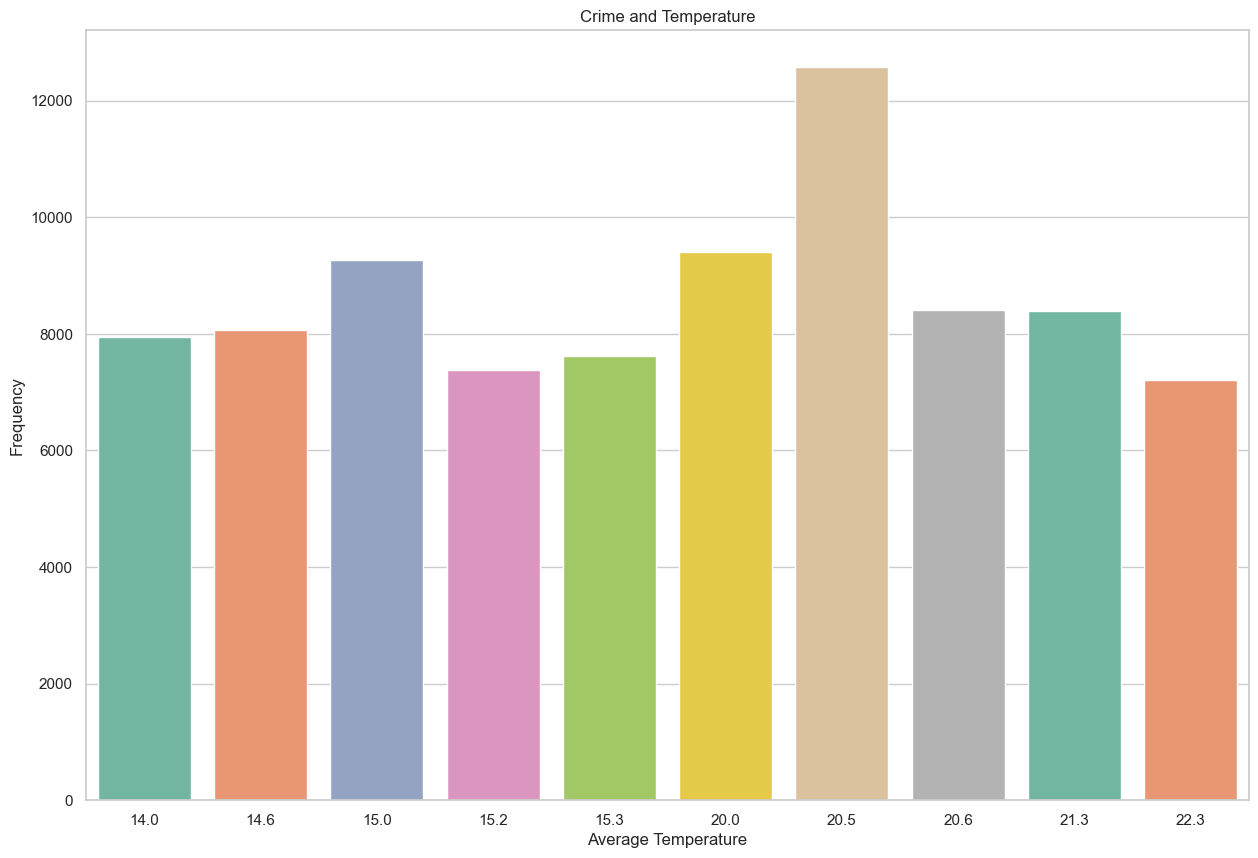

In [66]:
#avg temp and frequency of crime top 10
plt.figure(figsize=(15,10))
top_temp = df_final['temp'].value_counts().head(10)
sns.barplot(x=top_temp.index, y=top_temp.values, palette="Set2")
plt.title('Crime and Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

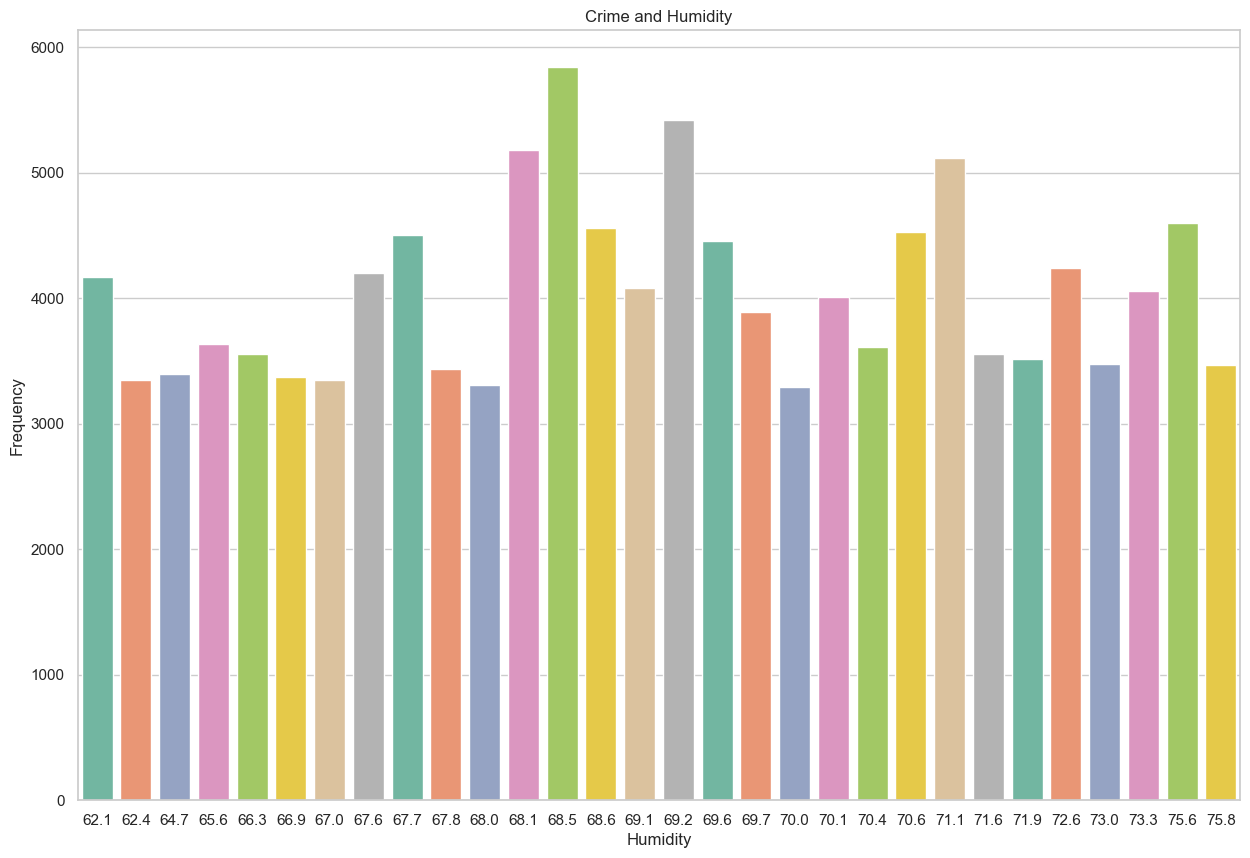

In [67]:
#humidity and frequency of crime top 30
plt.figure(figsize=(15,10))
top_humidity = df_final['humidity'].value_counts().head(30)
sns.barplot(x=top_humidity.index, y=top_humidity.values, palette="Set2")
plt.title('Crime and Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

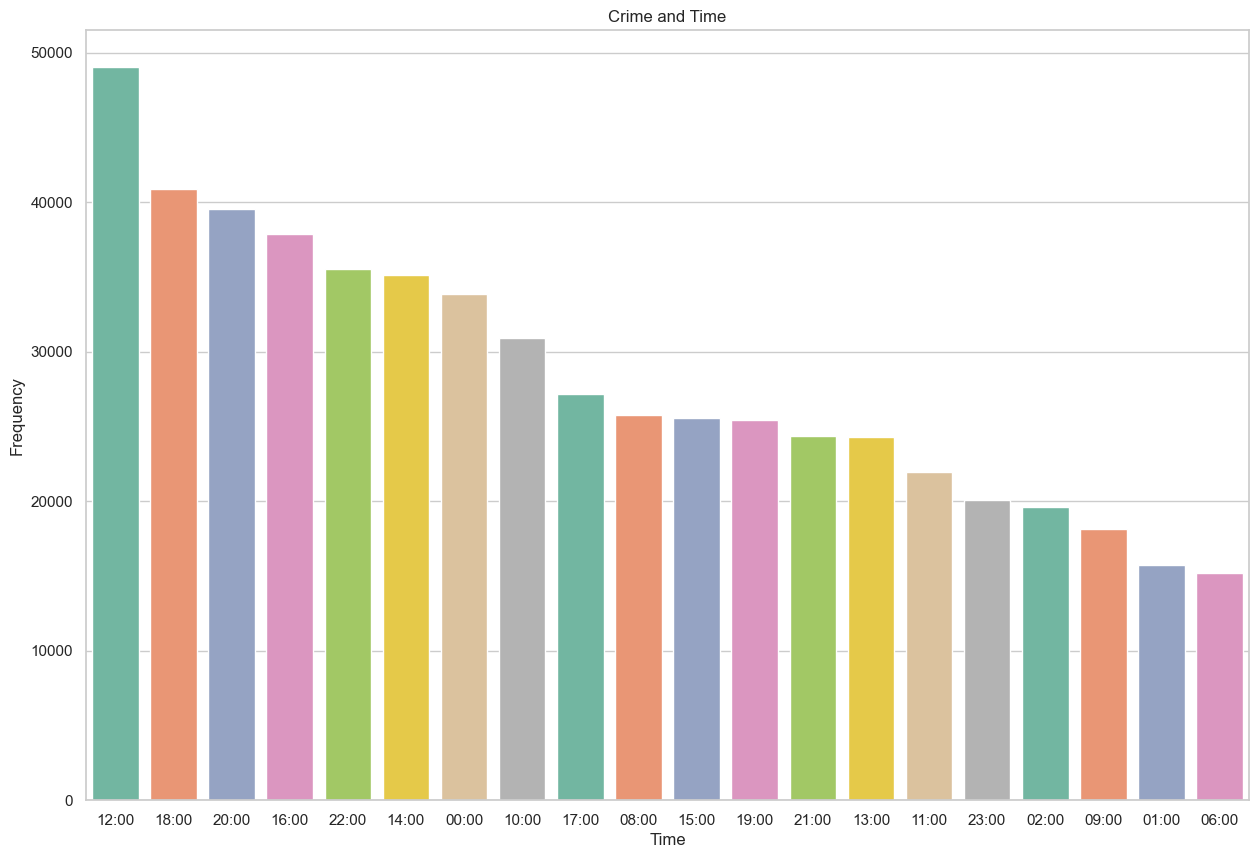

In [68]:
#time when crime is committed and frequency of crime top 20
plt.figure(figsize=(15,10))
top_time = df_final['rounded_crime_time'].value_counts().head(20)
sns.barplot(x=top_time.index, y=top_time.values, palette="Set2")
plt.title('Crime and Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [69]:
#remove rows with crime time 12:00 as it is an outlier
df_final = df_final[df_final['rounded_crime_time']!='12:00']

In [70]:
df_final[df_final['rounded_crime_time']=='12:00']

,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,year,month,day,rounded_crime_time,...,solarradiation,solarenergy,uvindex,moonphase,conditions,date_time_crime_occ,sunset_time_difference,sunrise_time_difference,sunrise_time,sunset_time


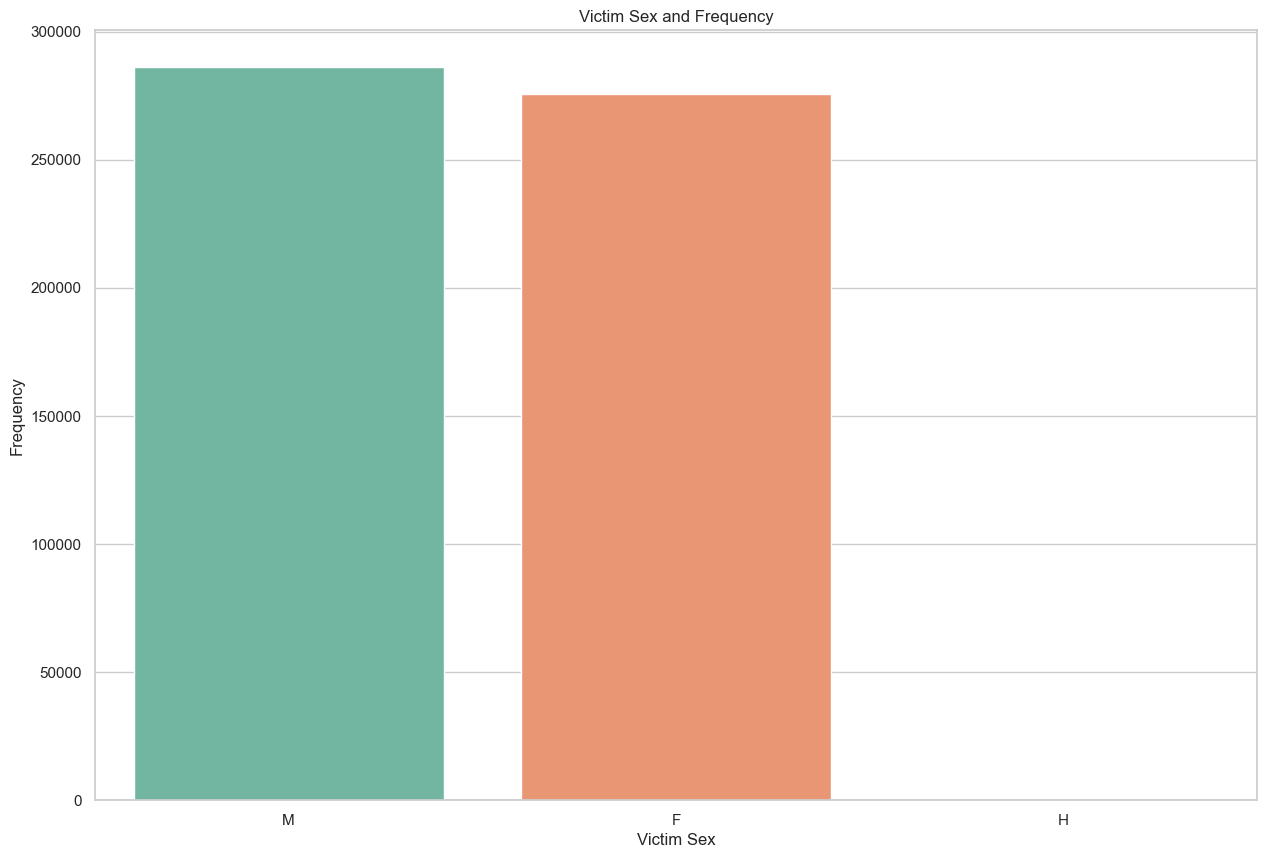

In [71]:
#plot victim sex and frequency
plt.figure(figsize=(15,10))
age11 = df_final['vict_sex'].value_counts()
sns.barplot(x=age11.index, y=age11.values, palette="Set2")
plt.title('Victim Sex and Frequency')
plt.xlabel('Victim Sex')
plt.ylabel('Frequency')
plt.show()


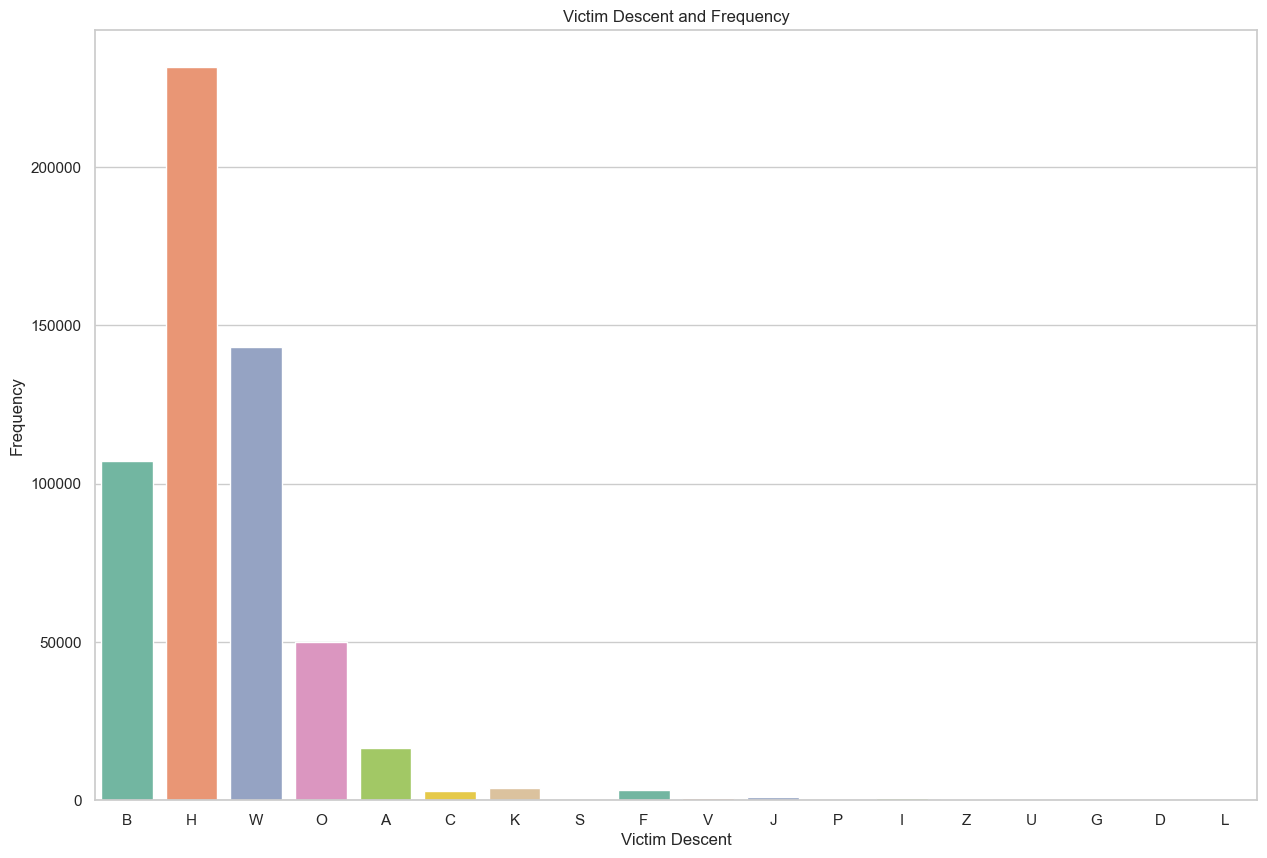

In [72]:
#plot victim descent and frequency
plt.figure(figsize=(15,10))
sns.countplot(data=df_final, x='vict_descent', palette="Set2")
plt.title('Victim Descent and Frequency')
plt.xlabel('Victim Descent')
plt.ylabel('Frequency')
plt.show()

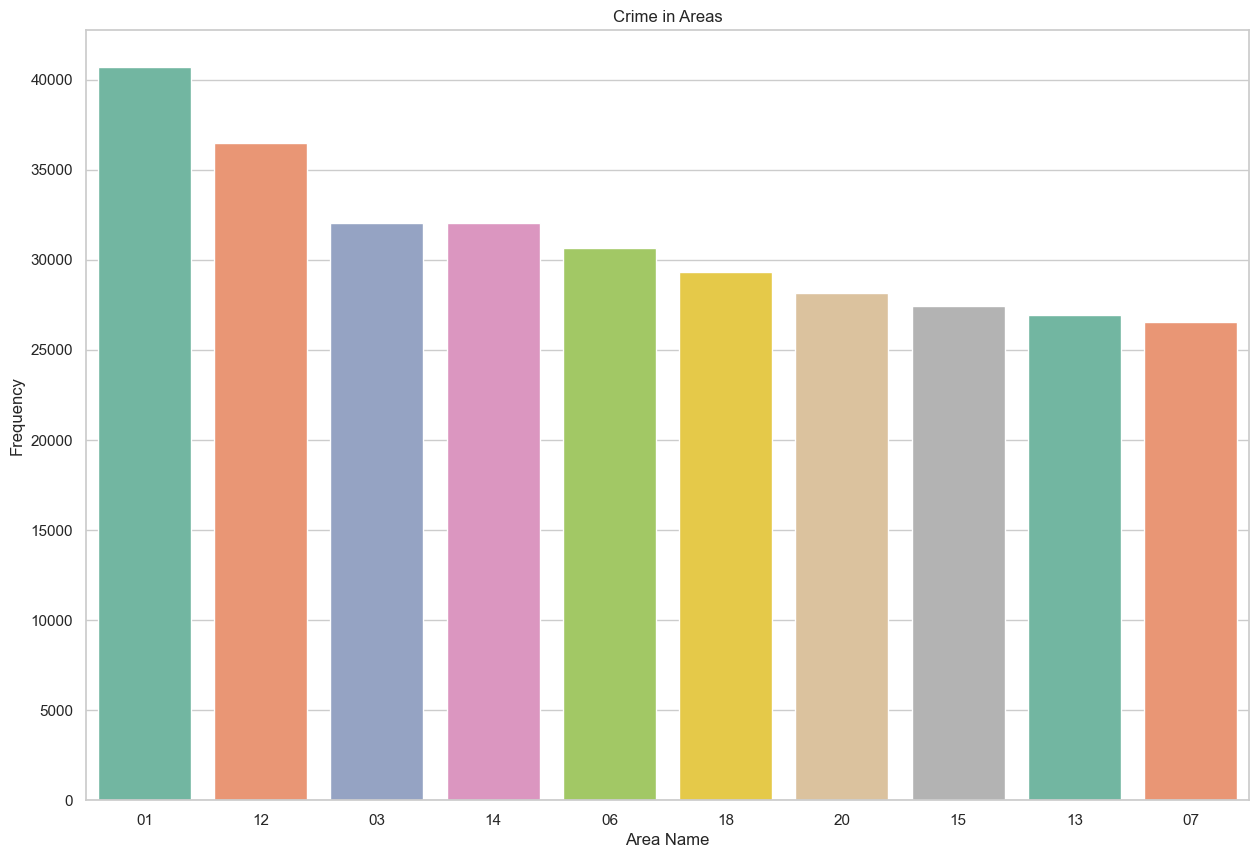

In [73]:
#plot top 10 area name and crime committed in them
plt.figure(figsize=(15,10))
top_areas = df_final['area'].value_counts().head(10)
sns.barplot(x=top_areas.index, y=top_areas.values, palette="Set2")
plt.title('Crime in Areas')
plt.xlabel('Area Name')
plt.ylabel('Frequency')
plt.show()


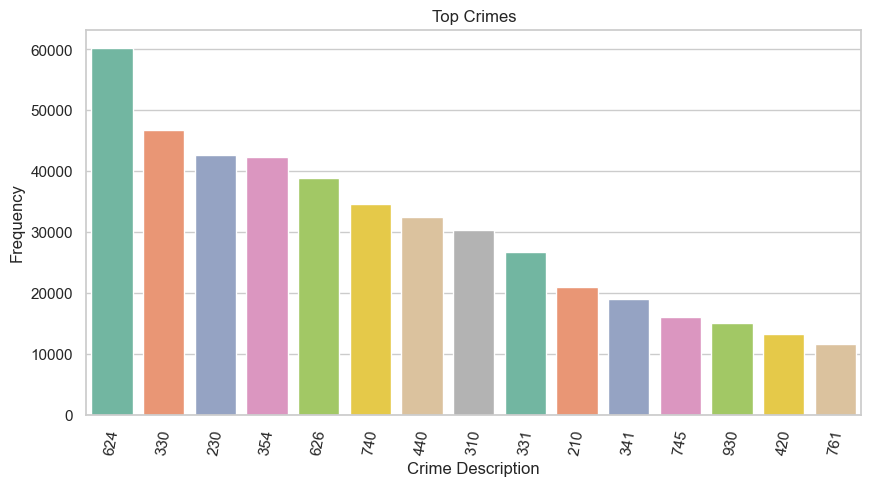

In [74]:
#plot top 13 crime committed
plt.figure(figsize=(10,5))
top_crimes = df_final['crm_cd'].value_counts().head(15)
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="Set2")
plt.title('Top Crimes')
plt.xlabel('Crime Description')
plt.ylabel('Frequency')
#rotate axis name
plt.xticks(rotation=80)
plt.show()

In [75]:
#13 categories of crime sufficient as they cover 75% data
percent_data= (df_final['crm_cd'].value_counts().head(13).sum()/df_final.shape[0])*100
percent_data

75.82560326557922

In [76]:
#crime codes selected 624,354,330,230,626,740,440,310,331,210,341,745,930 delete the rest of data
df_final = df_final[(df_final['crm_cd']=='624') | (df_final['crm_cd']=='354') | (df_final['crm_cd']=='330') | (df_final['crm_cd']=='230') | (df_final['crm_cd']=='626') | (df_final['crm_cd']=='740') | (df_final['crm_cd']=='440') | (df_final['crm_cd']=='310') | (df_final['crm_cd']=='331') | (df_final['crm_cd']=='210') | (df_final['crm_cd']=='341') | (df_final['crm_cd']=='745') | (df_final['crm_cd']=='930')]

In [77]:
df_final['crm_cd'].value_counts()

624    60219
330    46736
230    42589
354    42377
626    38885
740    34670
440    32394
310    30354
331    26660
210    21015
341    19062
745    16111
930    15055
Name: crm_cd, dtype: int64

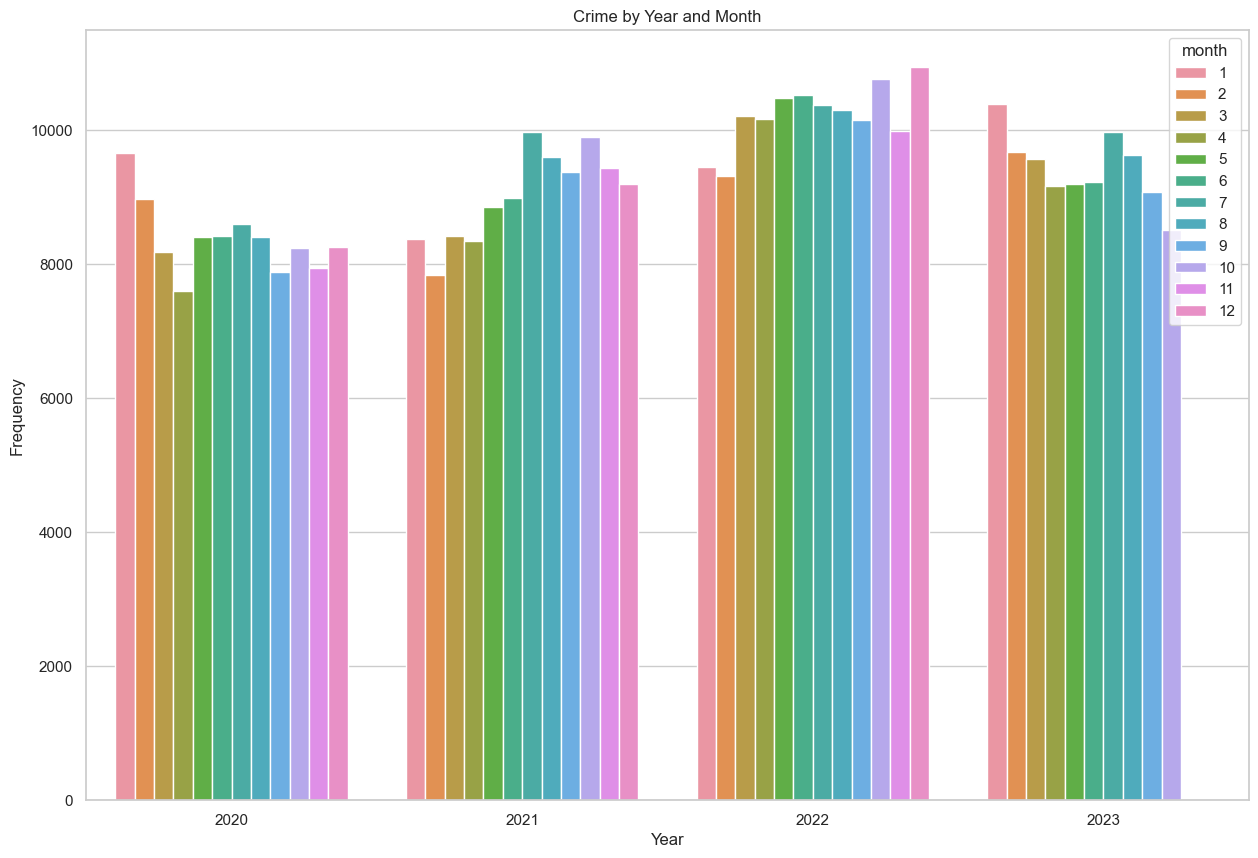

In [78]:
#plot crimes committed by year and month
plt.figure(figsize=(15,10))
sns.countplot(x='year',hue='month',data=df_final)
plt.title('Crime by Year and Month')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

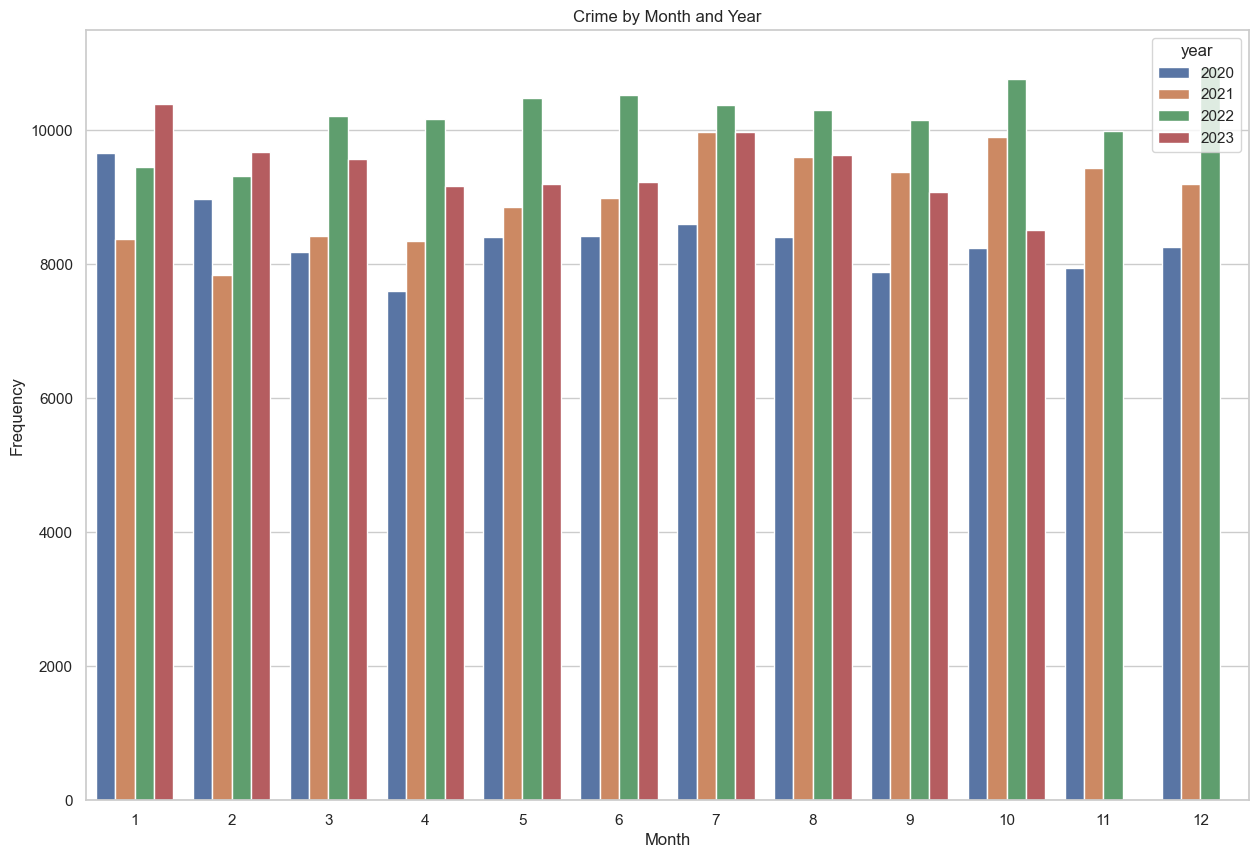

In [79]:
#plot crimes committed by year and month
plt.figure(figsize=(15,10))
sns.countplot(x='month',hue='year',data=df_final)
plt.title('Crime by Month and Year')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


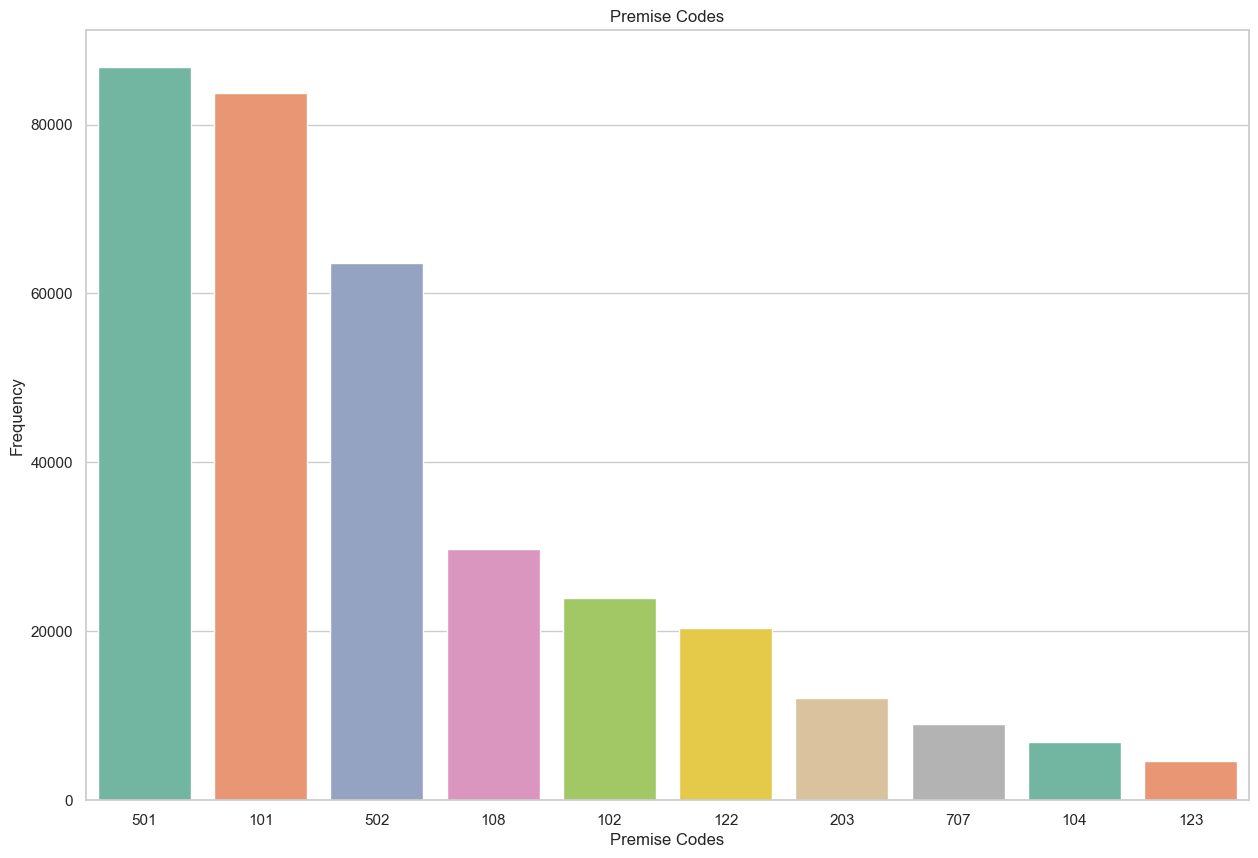

In [80]:
#plot premiscodes and frequency top 10
plt.figure(figsize=(15,10))
top_premis = df_final['premis_cd'].value_counts().head(10)
sns.barplot(x=top_premis.index, y=top_premis.values, palette="Set2")
plt.title('Premise Codes')
plt.xlabel('Premise Codes')
plt.ylabel('Frequency')
plt.show()

In [81]:
display(HTML(df_final.head().to_html()))

,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,year,month,day,rounded_crime_time,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,date_time_crime_occ,sunset_time_difference,sunrise_time_difference,sunrise_time,sunset_time
0,03,624,36,F,B,501,2020,1,8,22:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 22:30:00,5,16,06:59:19,17:00:05
5,01,624,30,M,W,102,2020,1,8,01:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 01:00:00,16,6,06:59:19,17:00:05
6,01,624,53,M,B,102,2020,1,8,10:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 09:50:00,7,3,06:59:19,17:00:05
7,01,740,55,M,W,517,2020,1,8,09:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 08:45:00,8,2,06:59:19,17:00:05
9,01,440,56,M,O,102,2020,1,8,02:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 02:00:00,15,5,06:59:19,17:00:05


In [82]:
df_final['premis_cd'].value_counts()

501    86825
101    83683
502    63612
108    29721
102    23903
       ...  
898        1
803        1
976        1
973        1
892        1
Name: premis_cd, Length: 309, dtype: int64

In [83]:
df_final['premis_cd'].unique()

array(['501', '102', '517', '101', '203', '903', '244', '108', '502',
       '503', '103', '104', '251', '122', '202', '151', '507', '707',
       '210', '510', '727', '221', '146', '119', '738', '208', '123',
       '504', '109', '701', '212', '710', '217', '117', '505', '406',
       '834', '735', '207', '801', '222', '121', '401', '411', '750',
       '725', '757', '733', '902', '147', '114', '726', '110', '702',
       '910', '252', '602', '120', '404', '213', '301', '511', '509',
       '247', '704', '751', '135', '516', '402', '810', '717', '518',
       '417', '403', '214', '804', '124', '232', '158', '716', '405',
       '248', '719', '254', '741', '708', '118', '514', '243', '229',
       '107', '201', '605', '152', '706', '721', '138', '145', '732',
       '728', '230', '729', '116', '140', '913', '911', '239', '148',
       '736', '920', '515', '218', '607', '506', '901', '916', '753',
       '905', '944', '909', '256', '722', '416', '802', '956', '935',
       '835', '249',

In [84]:
display(HTML(df_final.head().to_html()))

,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,year,month,day,rounded_crime_time,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,date_time_crime_occ,sunset_time_difference,sunrise_time_difference,sunrise_time,sunset_time
0,03,624,36,F,B,501,2020,1,8,22:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 22:30:00,5,16,06:59:19,17:00:05
5,01,624,30,M,W,102,2020,1,8,01:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 01:00:00,16,6,06:59:19,17:00:05
6,01,624,53,M,B,102,2020,1,8,10:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 09:50:00,7,3,06:59:19,17:00:05
7,01,740,55,M,W,517,2020,1,8,09:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 08:45:00,8,2,06:59:19,17:00:05
9,01,440,56,M,O,102,2020,1,8,02:00,18.1,11.5,14.3,8.3,68.1,0.0,0.0,0.0,9.8,65.8,1015.4,22.7,15.1,115.2,10.0,6,0.44,Partially cloudy,2020-01-08 02:00:00,15,5,06:59:19,17:00:05


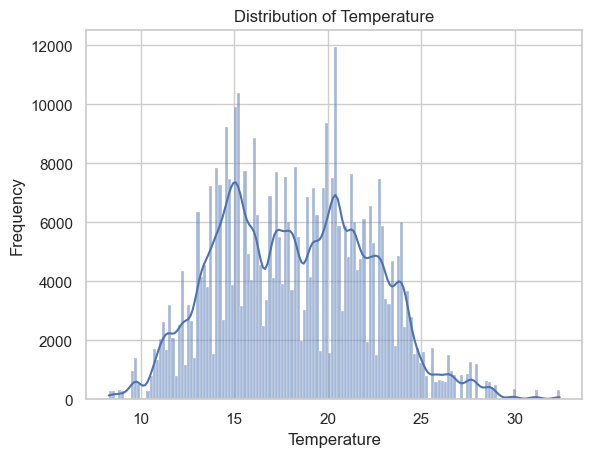

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_final, x="temp", kde=True)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [86]:
for i in df_final.columns:
    print(i)
    print(df_final[i].value_counts())
    print("Unique Values",len(df_final[i].unique()))

area
01    31979
12    27500
14    24482
06    23791
03    23359
18    22477
20    21688
13    21082
15    20824
07    20282
02    20053
08    19693
09    19201
10    17799
11    17600
21    16856
17    16429
19    16277
05    16018
04    14581
16    14156
Name: area, dtype: int64
Unique Values 21
crm_cd
624    60219
330    46736
230    42589
354    42377
626    38885
740    34670
440    32394
310    30354
331    26660
210    21015
341    19062
745    16111
930    15055
Name: crm_cd, dtype: int64
Unique Values 13
vict_age
30    13421
31    12938
29    12875
28    12670
32    12556
      ...  
94       58
95       55
96       52
98       42
97       35
Name: vict_age, Length: 98, dtype: int64
Unique Values 98
vict_sex
M    225011
F    201048
H        68
Name: vict_sex, dtype: int64
Unique Values 3
vict_descent
H    171321
W    109280
B     82536
O     38671
A     12569
K      3516
F      2802
C      2521
J       928
V       658
I       563
Z       318
P       171
U       103
D        48

In [87]:
#save final data to csv
#df_final.to_csv(r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\final_data_raw.csv', index=False)

Feature Selection, Relation between variables, choosing predictors for modelling

In [154]:
import pandas as pd
from IPython.display import display, HTML
df_final=pd.read_csv('final_data_raw.csv')

In [155]:
#convert rounded time to numerical feature
df_final['hour_crime_occ'] = pd.to_datetime(df_final['rounded_crime_time']).dt.hour

In [156]:
#drop variables
df_final.drop(columns=['year','date_time_crime_occ','sunrise_time','sunset_time','rounded_crime_time','precipprob','precipcover'],inplace=True)

In [157]:
df_final['crm_cd'].value_counts()

624    61000
330    47482
230    43881
354    42792
626    39261
740    38487
310    35961
440    34041
331    27359
210    22504
341    20723
745    17451
930    15361
Name: crm_cd, dtype: int64

In [158]:
top_premis = df_final.groupby('crm_cd')['premis_cd'].value_counts().groupby(level=0, group_keys=False).nlargest(7)



In [93]:

top_premis = top_premis.reset_index(name='Count')

top_premis = top_premis.pivot(index='premis_cd', columns='crm_cd', values='Count')

top_premis.fillna(0, inplace=True)

top_premis.reset_index(inplace=True)

top_premis.columns.name = None
top_premis = top_premis.sort_index(ascending=True)

top_premis.reset_index(drop=True, inplace=True)




In [94]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    selected_rows = top_premis.reset_index()[[624, 330, 230, 354, 626, 740, 440, 310, 331]]
    selected_rows.index = top_premis['premis_cd']  # Set the 'premis_cd' as the index
    print(selected_rows)


               624      330      230      354      626      740     440  \
premis_cd                                                                 
101         9665.0  19587.0  15334.0    928.0   5095.0   6200.0  1782.0   
102         6976.0      0.0   6539.0      0.0   1717.0      0.0  1318.0   
103            0.0      0.0    926.0      0.0      0.0      0.0     0.0   
104            0.0   1830.0      0.0      0.0      0.0      0.0     0.0   
108         3725.0  10583.0   3325.0      0.0   1308.0   2468.0   915.0   
119            0.0      0.0      0.0      0.0      0.0      0.0  2023.0   
120            0.0      0.0      0.0      0.0      0.0      0.0     0.0   
122            0.0      0.0      0.0      0.0    622.0  13568.0     0.0   
123            0.0   2641.0      0.0      0.0      0.0      0.0     0.0   
203         3233.0      0.0    936.0      0.0      0.0   1573.0  1691.0   
210         1240.0      0.0      0.0      0.0      0.0      0.0     0.0   
212            0.0      0

In [95]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_final['premis_cd'].value_counts())

501    87692
101    85770
502    64732
108    30864
102    24479
122    20998
203    15611
707     9157
104     6924
210     5550
123     4699
504     3943
103     3611
109     3541
710     3440
121     3212
503     2922
119     2763
402     2756
301     2587
221     2373
602     2319
212     2022
605     1908
406     1764
116     1757
801     1510
507     1479
401     1424
750     1362
702     1360
701     1269
404     1255
505     1213
124     1211
717     1196
721     1186
403     1018
202      998
207      978
145      884
213      881
222      863
118      830
117      829
405      803
704      791
727      769
510      760
720      759
735      742
120      708
708      655
252      655
834      639
517      586
217      559
506      550
719      538
248      522
725      516
158      515
518      505
242      455
514      412
509      403
722      401
751      382
733      380
146      358
218      334
243      328
738      281
247      263
516      234
726      216
904      210

Below code reduntant (Another way to select subset of data for modelling)

# Define the list of desired premis_cd values
desired_premis_cd = [101, 501, 502, 108, 707]

# Create a new DataFrame with rows that have 'premis_cd' in the desired list
df_final1 = df_final[df_final['premis_cd'].isin(desired_premis_cd)]

# Reset the index for the selected_rows_df
df_final1.reset_index(drop=True, inplace=True)




display(HTML(df_final1.head().to_html()))

df_final1['premis_cd'].value_counts()

df_final1['crm_cd'].value_counts()

#choose top 6 crm_cd
# Get the unique values in the 'crm_cd' column and count their occurrences
crm_cd_counts = df_final1['crm_cd'].value_counts()

# Choose the top 6 unique 'crm_cd' values
top_6_crm_cd = crm_cd_counts.head(6).index.tolist()

# Create a new DataFrame containing only the rows with the top 6 'crm_cd' values
df_final1 = df_final1[df_final1['crm_cd'].isin(top_6_crm_cd)]

# Reset the index for the new DataFrame
df_final1.reset_index(drop=True, inplace=True)

# Now, top_6_df contains rows with the top 6 'crm_cd' values from the original DataFrame.


Above code redundannt

Subset data for modelling - Original dataset was too large to model on our machines

In [96]:
# Filter 'premis_cd' values with counts greater than 10000
premis_counts = df_final['premis_cd'].value_counts()
df_final = df_final[df_final['premis_cd'].isin(premis_counts[premis_counts > 10000].index)]



In [97]:
df_final['premis_cd'].value_counts()

501    87692
101    85770
502    64732
108    30864
102    24479
122    20998
203    15611
Name: premis_cd, dtype: int64

In [98]:
df_final['crm_cd'].value_counts()

624    43563
626    35752
230    34983
330    34815
354    33310
740    31287
310    23921
331    21162
440    17436
210    16736
745    14576
930    12156
341    10449
Name: crm_cd, dtype: int64

In [99]:
#choose 3000 rows of crm_cd 624,330, 230, 354, 626, 740
df_624 = df_final[df_final['crm_cd']== 624].sample(n=6000, random_state=1)
df_330 = df_final[df_final['crm_cd']== 330].sample(n=6000, random_state=1)
df_230 = df_final[df_final['crm_cd']==230].sample(n=6000, random_state=1)
df_354 = df_final[df_final['crm_cd']==354].sample(n=6000, random_state=1)
df_626 = df_final[df_final['crm_cd']==626].sample(n=6000, random_state=1)
df_740 = df_final[df_final['crm_cd']==740].sample(n=6000, random_state=1)
# combine all these df into one
df_final1 = pd.concat([df_624,df_330,df_230,df_354,df_626,df_740],ignore_index=True)

In [100]:
df_final1['premis_cd'].value_counts()

101    9668
501    9227
502    6896
108    3603
122    2864
102    2627
203    1115
Name: premis_cd, dtype: int64

In [101]:
# Filter 'premis_cd' values with counts greater than 1000
premis_counts = df_final1['premis_cd'].value_counts()
df_final1 = df_final1[df_final1['premis_cd'].isin(premis_counts[premis_counts > 1000].index)]

In [102]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df_final1['premis_cd'].value_counts())


101    9668
501    9227
502    6896
108    3603
122    2864
102    2627
203    1115
Name: premis_cd, dtype: int64


In [103]:
df_final1.shape

(36000, 27)

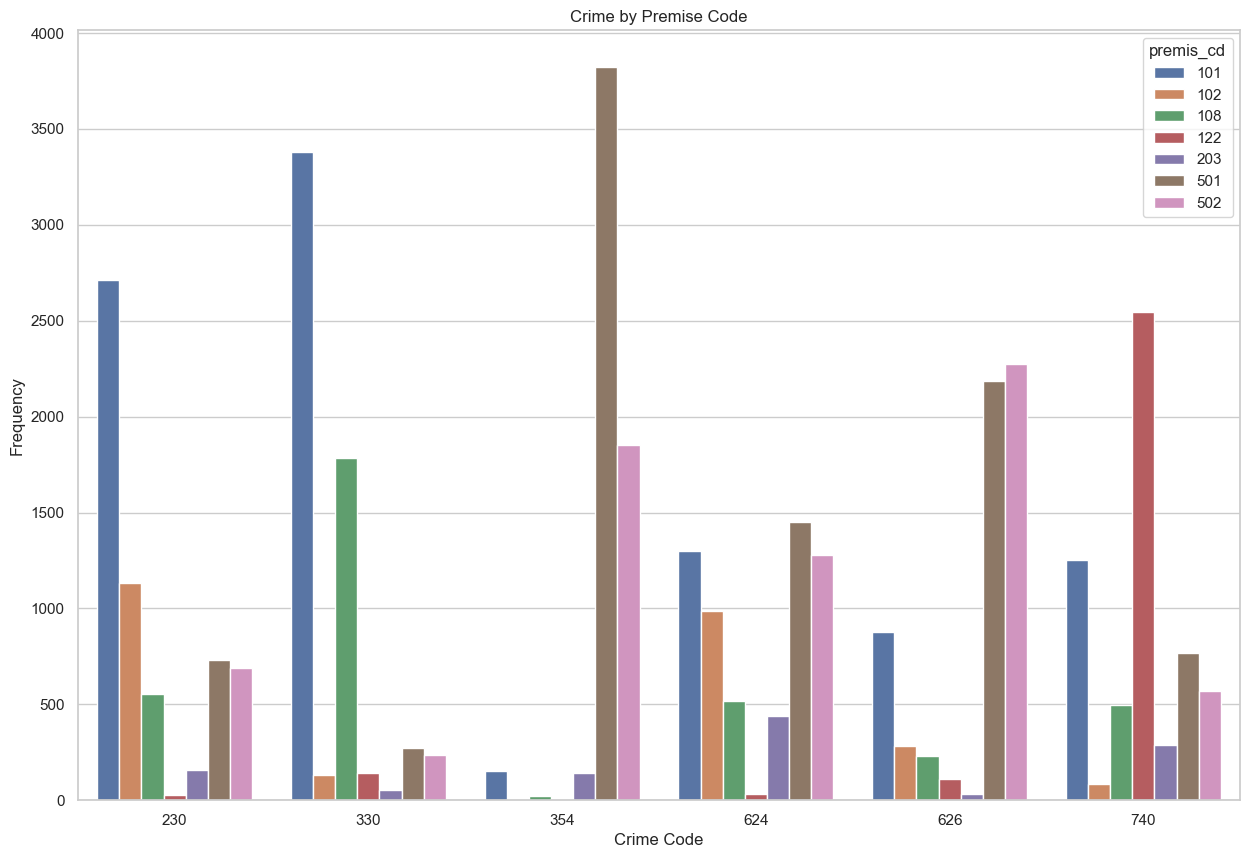

In [104]:
# plot cdm_cd and premis_cd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(x='crm_cd',hue='premis_cd',data=df_final1)
plt.title('Crime by Premise Code')
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.show()

Remove highly correlated variables

In [105]:
df_final_dummified_corr_matrix=pd.get_dummies(df_final1,columns=['crm_cd','area','vict_sex','vict_descent','conditions','premis_cd','month','day'],drop_first=True)

In [106]:
# Calculate the correlation matrix
import numpy as np
corr = df_final_dummified_corr_matrix.corr()

# Set the threshold for high correlation
threshold = 0.8

# Filter the correlations
high_corr = corr[(corr > threshold) & (corr < 1.0)]

# Fill diagonal elements with NaN
np.fill_diagonal(high_corr.values, np.nan)

# Create a DataFrame with highly correlated variables
high_corr_df = pd.DataFrame(columns=["Variable 1", "Variable 2", "Correlation"])
for col in high_corr.columns:
    for index, row in high_corr[col][high_corr[col].notna()].items():
        high_corr_df = high_corr_df.append({"Variable 1": col, "Variable 2": index, "Correlation": row}, ignore_index=True)

# Display the DataFrame
print(high_corr_df.sort_values(by="Correlation", ascending=False))


        Variable 1      Variable 2  Correlation
6   solarradiation     solarenergy     0.999882
8      solarenergy  solarradiation     0.999882
7   solarradiation         uvindex     0.941469
10         uvindex  solarradiation     0.941469
9      solarenergy         uvindex     0.941299
11         uvindex     solarenergy     0.941299
0          tempmax            temp     0.933074
3             temp         tempmax     0.933074
1          tempmin            temp     0.915709
4             temp         tempmin     0.915709
2          tempmin             dew     0.809379
5              dew         tempmin     0.809379


C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\509717274.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_corr_df = high_corr_df.append({"Variable 1": col, "Variable 2": index, "Correlation": row}, ignore_index=True)
C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\509717274.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_corr_df = high_corr_df.append({"Variable 1": col, "Variable 2": index, "Correlation": row}, ignore_index=True)
C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\509717274.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_corr_df = high_corr_df.append({"Variable 1": col, "Variable 2": index, "Correlation": row}, ignore_index=True)
C:\Users\tashf\AppData\Local\Temp\ipykernel_24

In [107]:
#remove highly correlated variables dew,tempmin, tempmax, solarenergy, solarradiation
df_final2=df_final1.drop(columns=['dew','tempmin','tempmax','solarenergy','solarradiation'])

In [108]:
display(HTML(df_final2.head().to_html()))

,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,month,day,temp,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex,moonphase,conditions,sunset_time_difference,sunrise_time_difference,hour_crime_occ
0,20,624,35,M,W,108,8,11,22.3,73.4,0.0,17.8,235.5,1014.8,66.2,15.9,7,0.84,Partially cloudy,19,6,0
1,4,624,30,M,O,102,6,8,24.8,17.5,0.0,15.4,323.9,1014.0,0.5,16.0,10,0.60,Clear,10,4,10
2,17,624,23,M,H,502,7,30,22.3,71.7,0.0,10.0,244.5,1013.0,7.8,16.0,6,0.07,Clear,17,3,3
3,20,624,58,F,W,501,3,31,18.6,55.1,0.0,12.0,262.8,1015.8,2.8,15.8,6,0.25,Clear,2,11,17
4,12,624,22,F,H,501,8,14,24.3,56.6,0.0,14.2,246.6,1011.9,1.9,16.0,9,0.59,Clear,10,3,10


In [109]:
df_final2.shape

(36000, 22)

In [110]:
#save final data to csv
#df_final2.to_csv(r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\final_data.csv', index=False)

In [111]:
df_final_dummified=pd.get_dummies(df_final2,columns=['area','vict_sex','vict_descent','conditions','premis_cd','month','day'],drop_first=True)

In [112]:
#save final data to csv
#df_final_dummified.to_csv(r'D:\Google Drive\McGill\Fall Semester\INSY 662\Team Project\Data\final_data_dummified.csv', index=False)

Modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [3]:
df_final2=pd.read_csv('final_data.csv')

In [4]:
df_final_dummified=pd.read_csv('final_data_dummified.csv')

In [5]:
df_final2.describe()

,area,crm_cd,vict_age,premis_cd,month,day,temp,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex,moonphase,sunset_time_difference,sunrise_time_difference,hour_crime_occ
count,36000.000000,36000.0000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,10.679917,484.0000,39.280944,286.375694,6.281194,14.815778,18.315719,62.535519,0.768589,13.700825,239.287092,1014.867453,28.137922,14.504392,7.049111,0.474590,6.851833,8.558611,12.833528
std,6.266959,187.2778,14.459539,194.978431,3.344588,9.118570,4.038363,14.157893,4.419710,4.834342,66.029615,3.767919,30.039360,2.178238,2.322024,0.286296,5.761382,5.004457,7.173177
min,1.000000,230.0000,2.000000,101.000000,1.000000,1.000000,8.300000,15.000000,0.000000,1.300000,0.000000,1001.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,330.0000,28.000000,101.000000,3.000000,7.000000,15.100000,55.800000,0.000000,10.300000,233.900000,1012.300000,2.000000,13.900000,6.000000,0.240000,2.000000,4.000000,7.000000
50%,11.000000,489.0000,36.000000,122.000000,6.000000,15.000000,18.200000,66.700000,0.000000,12.700000,254.300000,1014.300000,15.900000,15.500000,7.000000,0.470000,5.000000,8.000000,14.000000
75%,16.000000,626.0000,49.000000,501.000000,9.000000,23.000000,21.300000,71.800000,0.000000,16.700000,269.200000,1017.300000,50.500000,16.000000,9.000000,0.720000,11.000000,13.000000,19.000000
max,21.000000,740.0000,99.000000,502.000000,12.000000,31.000000,32.400000,93.900000,69.600000,42.800000,358.600000,1026.500000,100.000000,16.000000,10.000000,0.980000,20.000000,18.000000,23.000000


In [6]:
df_final2['crm_cd'].value_counts()


624    6000
330    6000
230    6000
354    6000
626    6000
740    6000
Name: crm_cd, dtype: int64

In [7]:
df_final2['premis_cd'].value_counts()

101    9559
501    9278
502    6896
108    3644
122    3003
102    2582
203    1038
Name: premis_cd, dtype: int64

In [8]:
# dummified variables ['area','vict_sex','vict_descent','conditions','premis_cd','month','day']

In [9]:
X=df_final_dummified.drop(columns='crm_cd')
y=df_final_dummified['crm_cd']

In [10]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

In [123]:
#Build a decision tree model and measure the accuracy score
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         230       0.32      0.32      0.32      2119
         330       0.43      0.43      0.43      2119
         354       0.48      0.49      0.49      2069
         624       0.26      0.25      0.25      2092
         626       0.32      0.34      0.33      2032
         740       0.49      0.47      0.48      2169

    accuracy                           0.38     12600
   macro avg       0.38      0.38      0.38     12600
weighted avg       0.39      0.38      0.38     12600



In [19]:
#build random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=2000,n_jobs=-1)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
#accouracy and recall
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.45      0.41      0.43      2119
           1       0.49      0.66      0.56      2119
           2       0.53      0.74      0.62      2069
           3       0.38      0.24      0.29      2092
           4       0.41      0.50      0.45      2032
           5       0.82      0.47      0.60      2169

    accuracy                           0.50     12600
   macro avg       0.52      0.50      0.49     12600
weighted avg       0.52      0.50      0.49     12600



In [20]:
from sklearn.metrics import recall_score
print(recall_score(y_test,rfc_pred,average='macro'))

0.5020586876168588


Use PCA

In [105]:
#apply PCA 
#standardixe data using MINMAX scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_std=scaler.fit_transform(X)


In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(X_std)

PCA(n_components=0.95)

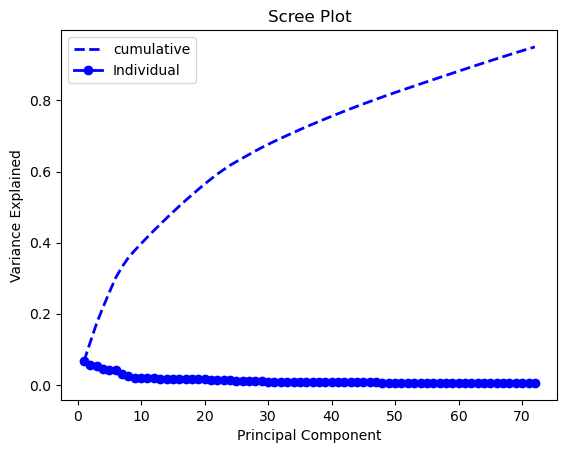

In [107]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

# plot cumulative explained variance and individual explained variance
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1 # adding 1 because in python we start from 0
plt.plot(PC_values, cum_explained_var, linestyle='--', linewidth=2, color='blue', label = 'cumulative')
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue', label = 'Individual')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

In [108]:
#choose 78 components
#fit the model
pca=PCA(n_components=78)
X_pca=pca.fit_transform(X_std)
X_pca_train,X_pca_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.35,random_state=42)

In [63]:
#ann model from mlp classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score
param_grid = {
    'hidden_layer_sizes': [
                (100, 100, 100, 100, 100, 100),
        (150, 150, 150, 150, 150, 150)
    ],
    'max_iter': [600, 800],
}

mlp = MLPClassifier()

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='recall_macro',n_jobs=-1)

grid_search.fit(X_pca_train, y_train)

best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

mlp_pred = best_mlp.predict(X_pca_test)

print("Best Parameters:", best_params)

print("Classification Report:")
print(classification_report(y_test, mlp_pred))
print("Macro-average Recall:", recall_score(y_test, mlp_pred, average='macro'))


Best Parameters: {'hidden_layer_sizes': (150, 150, 150, 150, 150, 150), 'max_iter': 800}
Classification Report:
              precision    recall  f1-score   support

         230       0.33      0.35      0.34      2119
         330       0.45      0.46      0.45      2119
         354       0.53      0.52      0.53      2069
         624       0.26      0.22      0.24      2092
         626       0.34      0.35      0.35      2032
         740       0.50      0.53      0.51      2169

    accuracy                           0.41     12600
   macro avg       0.40      0.41      0.40     12600
weighted avg       0.40      0.41      0.40     12600

Macro-average Recall: 0.4053925748643689


In [17]:
#random forest with pca
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score


rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_pca_train, y_train)
rfc_pred = rfc.predict(X_pca_test)
print("Classification Report:")
print(classification_report(y_test, rfc_pred))
print("Macro-average Recall:", recall_score(y_test, rfc_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

         230       0.45      0.38      0.41      2119
         330       0.47      0.69      0.56      2119
         354       0.52      0.75      0.61      2069
         624       0.41      0.23      0.29      2092
         626       0.42      0.48      0.44      2032
         740       0.85      0.47      0.60      2169

    accuracy                           0.50     12600
   macro avg       0.52      0.50      0.49     12600
weighted avg       0.52      0.50      0.49     12600

Macro-average Recall: 0.4984661346621683


Using Lasso

In [124]:
df_final_dummified=pd.read_csv('final_data_dummified.csv')

In [125]:
X=df_final_dummified.drop(columns='crm_cd')
y=df_final_dummified['crm_cd']

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_std=scaler.fit_transform(X)

In [127]:
#run lasso with alpha 0.1
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
model=lasso.fit(X_std,y)
all_predictor=pd.DataFrame(list(zip(X.columns,model.coef_)), columns = ['predictor','coefficient'])


In [128]:
#predictor with non zero coefficient
all_predictor[all_predictor['coefficient']!=0]

,predictor,coefficient
0,vict_age,30.447001
1,temp,13.403469
2,humidity,-7.186147
5,winddir,7.437540
7,cloudcover,0.515252
...,...,...
98,day_25,20.173756
99,day_26,6.510728
102,day_29,8.983036
103,day_30,3.230578


In [129]:
#columns with zero coefficient
zero_coeff=all_predictor[all_predictor['coefficient']==0]

In [1]:
zero_coeff['predictor'].tolist()   

NameError: name 'zero_coeff' is not defined

In [116]:
X_lasso_train=X_train.drop(columns=zero_coeff['predictor'].tolist())
X_lasso_test=X_test.drop(columns=zero_coeff['predictor'].tolist())

In [117]:
#standardixe data using MINMAX scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_lasso_train_std=scaler.fit_transform(X_lasso_train)
X_lasso_test_std=scaler.fit_transform(X_lasso_test)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score


#default values
#n_estimators=100, max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features='auto',
rfc = RandomForestClassifier(n_estimators=2500,max_depth=None,min_samples_split=2)
rfc.fit(X_lasso_train_std, y_train)
rfc_pred = rfc.predict(X_lasso_test_std)

print("Classification Report:")
print(classification_report(y_test, rfc_pred))

print("Macro-average Recall:", recall_score(y_test, rfc_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

         230       0.45      0.39      0.42      2119
         330       0.48      0.65      0.55      2119
         354       0.53      0.73      0.61      2069
         624       0.37      0.24      0.29      2092
         626       0.41      0.49      0.45      2032
         740       0.84      0.47      0.60      2169

    accuracy                           0.50     12600
   macro avg       0.51      0.50      0.49     12600
weighted avg       0.51      0.50      0.49     12600

Macro-average Recall: 0.49583755141077784


In [118]:
#label encode crime code
label_mapping = {
    230: 0,
    330: 1,
    354: 2,
    624: 3,
    626: 4,
    740: 5
}

y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)



In [119]:
y_train_encoded.value_counts()

4    3968
2    3931
3    3908
0    3881
1    3881
5    3831
Name: crm_cd, dtype: int64

In [92]:
#xgboot with lasso
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=2500,learning_rate=0.05,max_depth=None,random_state=42,n_jobs=-1)
xgb_model.fit(X_lasso_train_std,y_train_encoded)
xgb_pred=xgb_model.predict(X_lasso_test_std)
print("Classification Report:")
print(classification_report(y_test_encoded, xgb_pred))
print("Macro-average Recall:", recall_score(y_test_encoded, xgb_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.39      0.40      2119
           1       0.49      0.57      0.53      2119
           2       0.57      0.66      0.61      2069
           3       0.32      0.28      0.30      2092
           4       0.40      0.45      0.42      2032
           5       0.66      0.50      0.57      2169

    accuracy                           0.48     12600
   macro avg       0.48      0.48      0.47     12600
weighted avg       0.48      0.47      0.47     12600

Macro-average Recall: 0.47502248848747786


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

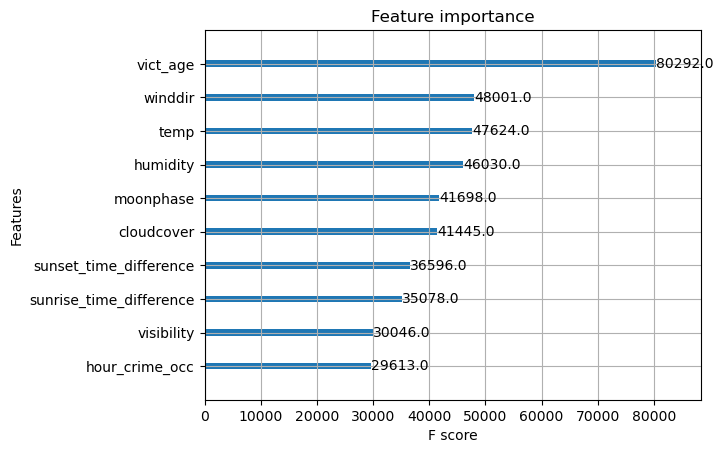

In [94]:
from xgboost import plot_importance
feature_names=X_lasso_train.columns.to_list()
xgb_model.get_booster().feature_names = feature_names

plot_importance(xgb_model, max_num_features=10) # top 10 most important features

In [71]:
#ANN with lasso
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(200, 200, 200, 200,200,200), (100, 100, 100, 100, 100, 100, 100)],
    'max_iter': [800, 1000],
}
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='recall_macro',n_jobs=-1)

grid_search.fit(X_lasso_train_std, y_train)

best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

mlp_pred = best_mlp.predict(X_lasso_test_std)

print("Best Parameters:", best_params)

print("Classification Report:")
print(classification_report(y_test, mlp_pred))

print("Macro-average Recall:", recall_score(y_test, mlp_pred, average='macro'))



Best Parameters: {'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'max_iter': 800}
Classification Report:
              precision    recall  f1-score   support

         230       0.35      0.30      0.33      2119
         330       0.43      0.37      0.40      2119
         354       0.54      0.47      0.50      2069
         624       0.24      0.30      0.27      2092
         626       0.33      0.43      0.37      2032
         740       0.56      0.50      0.53      2169

    accuracy                           0.40     12600
   macro avg       0.41      0.40      0.40     12600
weighted avg       0.41      0.40      0.40     12600

Macro-average Recall: 0.39600421258126955


Model with 3 crime codes that showed highest accuracy and recall score before

In [11]:
df_final3=df_final2.copy()

In [12]:
#select only crime codes 310 624 230
df1=df_final3[df_final3["crm_cd"]==330]
df2=df_final3[df_final3["crm_cd"]==624]
df3=df_final3[df_final3["crm_cd"]==230]
df_final4=pd.concat([df1,df2,df3],ignore_index=True)


In [13]:
df_final4.head()

,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,month,day,temp,humidity,...,winddir,sealevelpressure,cloudcover,visibility,uvindex,moonphase,conditions,sunset_time_difference,sunrise_time_difference,hour_crime_occ
0,15,330,38,F,H,101,12,19,11.8,52.6,...,346.3,1019.4,0.4,15.3,6,0.52,Clear,6,16,22
1,2,330,54,F,H,502,1,15,12.8,84.9,...,256.3,1010.4,79.7,13.0,3,0.80,"Rain, Partially cloudy",8,2,9
2,9,330,42,M,F,502,5,27,17.7,67.3,...,256.0,1015.7,53.8,16.0,9,0.91,Partially cloudy,3,11,17
3,1,330,29,F,W,108,5,2,14.6,62.7,...,238.2,1012.8,47.4,15.9,10,0.41,Partially cloudy,1,13,19
4,3,330,24,M,H,101,8,20,23.1,83.6,...,338.9,1003.0,86.2,10.3,1,0.15,"Rain, Partially cloudy",1,13,19


In [14]:
df_final4['crm_cd'].value_counts()

330    6000
624    6000
230    6000
Name: crm_cd, dtype: int64

In [15]:
df_final4['premis_cd'].value_counts()

101    7301
108    2947
501    2492
502    2243
102    2188
203     654
122     175
Name: premis_cd, dtype: int64

In [16]:
#keep premis code above 2000
premis_counts = df_final4['premis_cd'].value_counts()
df_final4 = df_final4[df_final4['premis_cd'].isin(premis_counts[premis_counts > 2000].index)]

In [17]:
df_final4.shape

(17171, 22)

In [18]:
df_final_dummified=pd.get_dummies(df_final4,columns=['area','vict_sex','vict_descent','conditions','premis_cd','month','day'],drop_first=True)

In [19]:
# Define a mapping from original labels to new labels
label_mapping = {
    330: 0,
    624: 1,
    230: 2
}

# Use the mapping to encode the target variable
df_final_dummified['crm_cd'] = df_final_dummified['crm_cd'].map(label_mapping)


330: Burglary from Vehicle
624: Battery Simple Assault
230: Assault with deadly weapon

In [20]:
X=df_final_dummified.drop(columns='crm_cd')
y=df_final_dummified['crm_cd']

In [21]:
#standardixe data using MINMAX scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_std=scaler.fit_transform(X)


In [22]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.35,random_state=42)


In [143]:
#XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score
xgb = XGBClassifier(n_estimators=3000, max_depth=None, learning_rate=0.1, n_jobs=-1)
#DEFAULT VALUES n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, xgb_pred))
print("Macro-average Recall:", recall_score(y_test, xgb_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      2016
           1       0.52      0.49      0.51      1996
           2       0.47      0.48      0.47      1998

    accuracy                           0.54      6010
   macro avg       0.54      0.54      0.54      6010
weighted avg       0.54      0.54      0.54      6010

Macro-average Recall: 0.5379291013267299


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

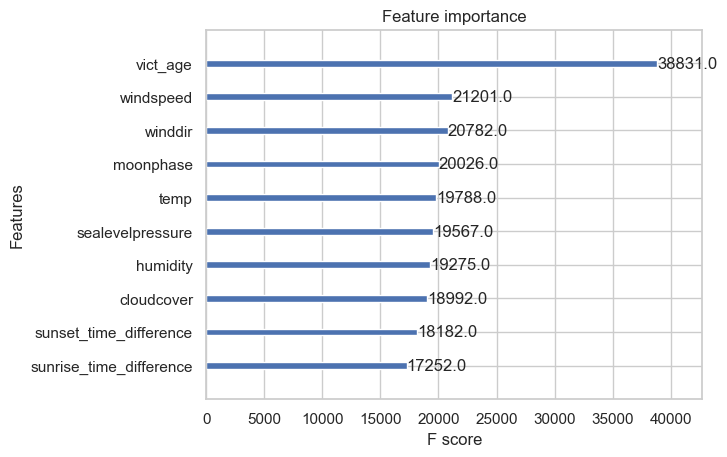

In [144]:
#plot feature importance
from xgboost import plot_importance
feature_names = X.columns.tolist()

xgb.get_booster().feature_names = feature_names

# Plot the feature importance with actual feature names
plot_importance(xgb, max_num_features=10)




Macro-average ROC AUC: 0.725
Micro-average ROC AUC: 0.731


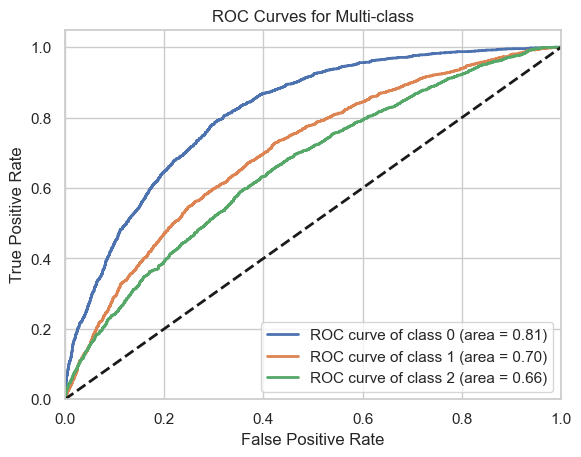

In [145]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])

roc_auc = roc_auc_score(y_bin, xgb.predict_proba(X_test), multi_class='ovr', average='macro')
print('Macro-average ROC AUC: %.3f' % roc_auc)

roc_auc_micro = roc_auc_score(y_bin, xgb.predict_proba(X_test), multi_class='ovr', average='micro')
print('Micro-average ROC AUC: %.3f' % roc_auc_micro)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], xgb.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3): 
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [23]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
rfc = RandomForestClassifier(n_estimators=3000, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, rfc_pred))
print("Macro-average Recall:", recall_score(y_test, rfc_pred, average='macro'))


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      2016
           1       0.59      0.52      0.55      1996
           2       0.50      0.49      0.49      1998

    accuracy                           0.57      6010
   macro avg       0.57      0.57      0.57      6010
weighted avg       0.57      0.57      0.57      6010

Macro-average Recall: 0.5711230990748359


Macro-average ROC AUC: 0.758
Micro-average ROC AUC: 0.765


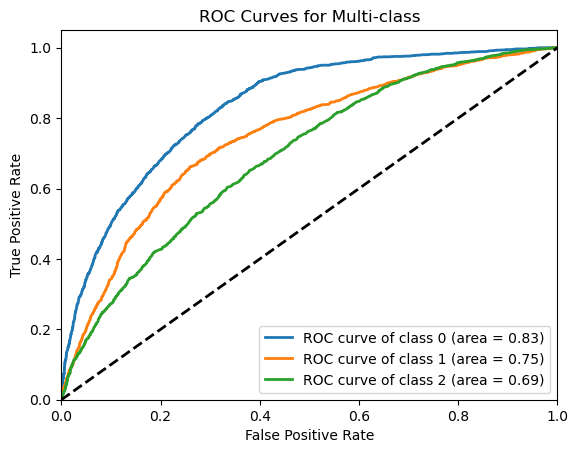

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])

roc_auc = roc_auc_score(y_bin, rfc.predict_proba(X_test), multi_class='ovr', average='macro')
print('Macro-average ROC AUC: %.3f' % roc_auc)

roc_auc_micro = roc_auc_score(y_bin, rfc.predict_proba(X_test), multi_class='ovr', average='micro')
print('Micro-average ROC AUC: %.3f' % roc_auc_micro)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], rfc.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3): 
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [147]:
#prediction for random forest 
a=df_final_dummified.iloc[9000:9100,:]

In [148]:
display(HTML(a.head().to_html()))

,crm_cd,vict_age,temp,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex,moonphase,sunset_time_difference,sunrise_time_difference,hour_crime_occ,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10,area_11,area_12,area_13,area_14,area_15,area_16,area_17,area_18,area_19,area_20,area_21,vict_sex_H,vict_sex_M,vict_descent_B,vict_descent_C,vict_descent_D,vict_descent_F,vict_descent_G,vict_descent_H,vict_descent_I,vict_descent_J,vict_descent_K,vict_descent_L,vict_descent_O,vict_descent_P,vict_descent_U,vict_descent_V,vict_descent_W,vict_descent_Z,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy",premis_cd_102,premis_cd_108,premis_cd_501,premis_cd_502,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
9453,1,83,15.9,68.2,5.28,21.3,258.1,1019.6,41.8,14.9,8,0.98,1,12,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9454,1,43,23.4,49.0,0.00,13.5,254.1,1011.1,0.2,15.8,10,0.75,20,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9455,1,44,15.6,65.5,0.00,21.1,274.3,1012.7,57.0,16.0,9,0.45,4,9,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9456,1,60,13.2,44.0,0.00,13.1,288.7,1019.4,0.4,16.0,6,0.85,2,12,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9457,1,57,16.8,59.4,0.00,17.1,226.3,1016.8,8.0,16.0,9,0.75,3,16,22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [149]:
a.drop(columns='crm_cd',inplace=True)

C:\Users\tashf\AppData\Local\Temp\ipykernel_24288\1847210834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(columns='crm_cd',inplace=True)


In [150]:
#predict using random forest
s=rfc.predict(a)
s

c:\Users\tashf\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0], dtype=int64)

In [151]:
#metrics for prediction random forest
rfc.predict_proba(a)

c:\Users\tashf\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0.27666667, 0.41133333, 0.312     ],
       [0.15966667, 0.37533333, 0.465     ],
       [0.205     , 0.42533333, 0.36966667],
       [0.31533333, 0.35466667, 0.33      ],
       [0.185     , 0.40133333, 0.41366667],
       [0.38933333, 0.29833333, 0.31233333],
       [0.15966667, 0.40366667, 0.43666667],
       [0.30433333, 0.37      , 0.32566667],
       [0.38433333, 0.31366667, 0.302     ],
       [0.264     , 0.35966667, 0.37633333],
       [0.22833333, 0.45      , 0.32166667],
       [0.30966667, 0.29233333, 0.398     ],
       [0.20833333, 0.481     , 0.31066667],
       [0.19166667, 0.36833333, 0.44      ],
       [0.35133333, 0.33066667, 0.318     ],
       [0.20866667, 0.44133333, 0.35      ],
       [0.18966667, 0.41766667, 0.39266667],
       [0.20233333, 0.41433333, 0.38333333],
       [0.35766667, 0.31933333, 0.323     ],
       [0.16233333, 0.431     , 0.40666667],
       [0.18166667, 0.35433333, 0.464     ],
       [0.417     , 0.31833333, 0.26466667],
       [0.

In [152]:
#convert array to dataframe
predicted=pd.DataFrame(s,columns=['predicted'])

In [153]:
predicted['predicted'].value_counts()

1    52
2    28
0    20
Name: predicted, dtype: int64